# Model Development

- Name       : 
- Model      : 
- Output Tag :

In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import additional libraries as required..

In [13]:
x_train = pd.read_csv("../data/featureEngineeredData/x_train.csv")
x_valid = pd.read_csv("../data/featureEngineeredData/x_valid.csv")
x_test = pd.read_csv("../data/featureEngineeredData/x_test.csv")

y_train = pd.read_csv("../data/featureEngineeredData/y_train.csv")
y_valid = pd.read_csv("../data/featureEngineeredData/y_valid.csv")
y_test = pd.read_csv("../data/featureEngineeredData/y_test.csv")

In [14]:
print(f"-X -Data Stats--")
print(f"Train Data      : {x_train.shape}")
print(f"Validation Data : {x_valid.shape}")
print(f"Test Data       : {x_test.shape}")

-X -Data Stats--
Train Data      : (53210, 6)
Validation Data : (17736, 6)
Test Data       : (17736, 6)


In [15]:
print(f"-Y -Data Stats--")
print(f"Train Data      : {y_train.shape}")
print(f"Validation Data : {y_valid.shape}")
print(f"Test Data       : {y_test.shape}")

-Y -Data Stats--
Train Data      : (53210, 3)
Validation Data : (17736, 3)
Test Data       : (17736, 3)


## Start Your Model Development

In [16]:
import tensorflow as tf 
from tensorflow.keras import layers

In [17]:
y_train.columns

Index(['FT-92537-01', 'TT-92539', 'PT-92539'], dtype='object')

In [18]:
def prepTimeFrameData(x_df,y_df, lookback = 9):
    x_new = []
    y_new_FT = []
    y_new_TT = []
    y_new_PT = []
    for index,row in x_df.iterrows():
        if index >= lookback: 
            tempEntry = []
            for col in x_df.columns:
                timeFrame = np.array(x_df[col][index-lookback:index])
                tempEntry.append(timeFrame)
            y_new_FT.append(np.array(y_df.iloc[index,0]))
            y_new_TT.append(np.array(y_df.iloc[index,1]))
            y_new_PT.append(np.array(y_df.iloc[index,2]))
            x_new.append(tempEntry)
    x_new = np.array(x_new)
    y_new_FT = np.array(y_new_FT)
    y_new_TT = np.array(y_new_TT)
    y_new_PT = np.array(y_new_PT)

    return x_new, y_new_FT, y_new_TT, y_new_PT

In [19]:
x_train_new, y_train_new_FT, y_train_new_TT, y_train_new_PT = prepTimeFrameData(x_train,y_train)
x_valid_new, y_valid_new_FT, y_valid_new_TT, y_valid_new_PT = prepTimeFrameData(x_valid,y_valid)
x_test_new, y_test_new_FT, y_test_new_TT, y_test_new_PT = prepTimeFrameData(x_test,y_test)

In [20]:
x_train_new.shape,y_train_new_FT.shape

((53201, 6, 9), (53201,))

In [22]:
model_enc_dec = tf.keras.Sequential()
model_enc_dec.add(layers.LSTM(128, activation='tanh', input_shape=(6, 9),return_sequences = True))
model_enc_dec.add(layers.LSTM(64, activation='tanh'))
model_enc_dec.add(layers.Dense(32, activation='tanh'))
model_enc_dec.add(layers.Dense(16, activation='tanh'))
model_enc_dec.add(layers.Dense(1, activation='tanh'))
model_enc_dec.summary()
model_enc_dec.compile(loss=["mae"],optimizer=tf.keras.optimizers.Adam())
model_enc_dec.summary()
history = model_enc_dec.fit(x_train_new,y_train_new_FT,epochs=100,verbose=1,batch_size=32, validation_data=(x_valid_new, y_valid_new_FT))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 6, 128)            70656     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 122,689
Trainable params: 122,689
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
__________________________

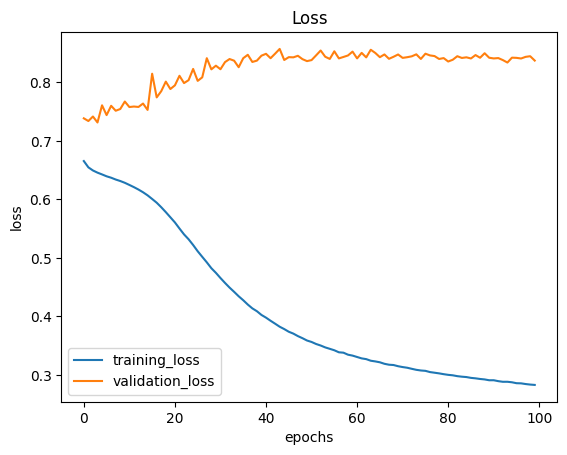

In [23]:
plt.plot(history.history['loss'],label = 'training_loss')
plt.plot(history.history['val_loss'],label = 'validation_loss')
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()